# ПОСТРОЕНИЕ И ИССЛЕДОВАНИЕ ХАРАКТЕРИСТИК ДАТЧИКОВ БАЗОВЫХ СЛУЧАЙНЫХ ВЕЛИЧИН

In [1]:
cap = 8

## Метод середины квадратов

In [2]:
def f1(z):
    r = str(z ** 2)      
    e = -cap // 2
    s = e - cap
    return int(r[s:e])

z = 12345678

## Мультипликативный конгруэнтный метод

In [3]:
f2 = lambda a: (k * a) % m

k = 152587890625
m = 34359738368
a = 12345678

## Генерирация СВ

In [4]:
l1 = lambda v: v / 10 ** max(cap, len(str(v)))
l2 = lambda v: v / m

def gen(n):
    res1 = []
    res2 = []
    for v, f, res, l in ((z, f1, res1, l1), (a, f2, res2, l2)):
        for _ in range(n):
            v = f(v)
            res.append(l(v))
    return res1, res2

n_list = (1000, 1000000)
results_1, results_2 = (gen(n) for n in n_list)

## Тестирование равномерности

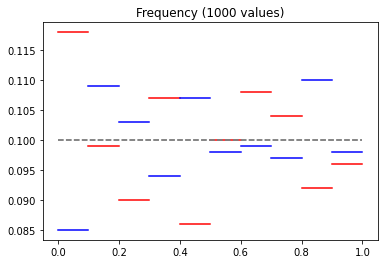

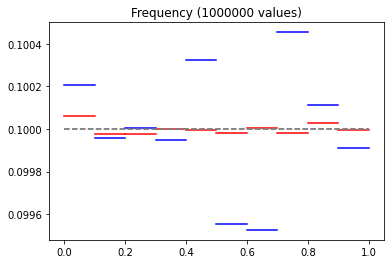

In [5]:
import matplotlib.pyplot as plt

K = 10
d = 1 / K

for results in (results_1, results_2):
    for args in ((results[0], 'r'), (results[1], 'b')):
        for i in range(K):
            s, e = i * d, (i + 1) * d
            ni = len(list(filter(lambda v: s <= v < e, args[0])))
            plt.plot([s,e], [ni/len(args[0]), ni/len(args[0])], color=args[1])
        plt.plot([0,1], [d, d], '--', color='gray')
        print('\n')
    plt.title(f'Frequency ({len(args[0])} values)')
    plt.show()

#### Математическое ожидание

In [6]:
M = lambda r: sum(r) / len(r)

#### Дисперсия

In [7]:
def D(r):
    _m = M(r) ** 2
    return sum(map(lambda x: x ** 2 - _m, r)) / len(r)

In [8]:
for i, n in enumerate(n_list):
    print(f'# {n} значений')

    for res in (results_1, results_2):
        print('Мат. ожидание:', M(res[i]))
        print('Дисперсия:', D(res[i]))

# 1000 значений
Мат. ожидание: 0.4914749157000004
Дисперсия: 0.08441653677652035
Мат. ожидание: 0.49761712624897897
Дисперсия: 0.083366629926103
# 1000000 значений
Мат. ожидание: 0.5047936574420891
Дисперсия: 0.08220013832057849
Мат. ожидание: 0.49991192817401514
Дисперсия: 0.08340163882456343


## Тестирование независимости

In [9]:
s = 3

from scipy import stats as st

for res in (results_1, results_2):
    print(st.pearsonr(res[0][s:], res[1][s:])[0])

0.02845481176227044
-0.0003248655458595718
